In [1]:
import torch
import torchaudio
from torchvision.datasets import DatasetFolder
import matplotlib.pyplot as plt
from utils import *

100.0%


In [109]:
# helper functions
def load_audio(path):
    return torchaudio.load(path)[0]

def custom_collate(batch):
    transposed = list(zip(*batch))
    samples = transposed[0]
    targets = torch.LongTensor(transposed[1])
    return [samples, targets]

def compute_spectrogram(audio_path, window=512):
    wav = load_audio(audio_path)
    transform = torchaudio.transforms.Spectrogram(n_fft=window)
    return transform(wav)

def plot_time_freq(im_path, spctgm):
    fig = plt.figure()
    plt.axis('off')
    plt.set_cmap('viridis')
    plt.imshow(librosa.power_to_db(spctgm.squeeze(0)), aspect=2.5)
    plt.savefig(im_path, bbox_inches='tight')
    plt.close()

## Test

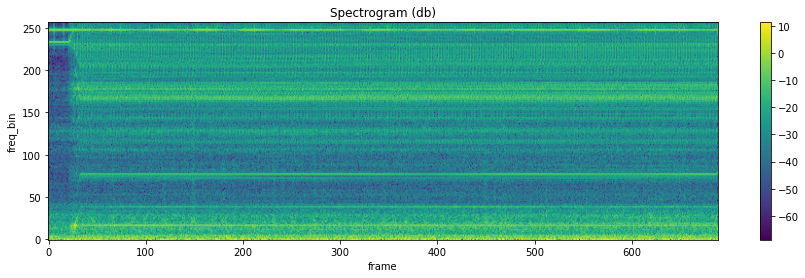

In [77]:
# test the audio loader and plot some spectrogram
wav_file_name = 'F2000/0_degree/F2000_D0_0_x.wav'
wav = load_audio(wav_file_name)
transform = torchaudio.transforms.Spectrogram(n_fft=512)
stft = transform(wav)
plot_spectrogram(stft.squeeze(0))

In [110]:
# test my own helper functions
stft = compute_spectrogram(wav_file_name)
plot_time_freq('test.png', stft)

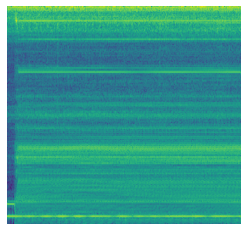

In [97]:
# test plotting spectrogram
fig = plt.figure()
plt.axis('off')
plt.set_cmap('viridis')
plt.imshow(librosa.power_to_db(stft.squeeze(0)), aspect=2.5)
plt.savefig('test.png', bbox_inches='tight')

In [ ]:
import os
from tqdm.notebook import tqdm
root = './F2000'
tnranget = './F2000_img'
classes = os.listdir(root)
for classname in tqdm(classes):
    if classname != '.DS_Store':
        class_dir = os.path.join(root, classname)
        dest_class_dir = os.path.join(dest, classname)
        os.makedirs(dest_class_dir, exist_ok=True)
        files = os.listdir(class_dir)
        for fname in tqdm(files):
            if fname.endswith('.wav'):
                file_dir = os.path.join(class_dir, fname)
                dest_file_dir = os.path.join(dest_class_dir, fname.split('.')[0]+'.png')
                stft = compute_spectrogram(file_dir)
                plot_time_freq(dest_file_dir, stft)

In [126]:
from tqdm.notebook import trange
from time import sleep

for i in trange(10):
    for j in trange(10):
        sleep(1)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]